In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from functions.match_functions import *
from functions.preprocess_functions import *

In [5]:
test=pd.read_csv("all_wells_20250411.csv",index_col=0)
values_df=pd.read_csv("first_plate/first_plate_targets.csv", sep=";")
test.columns=['CCS', 'Precursor_type', 'PrecursorMZ', 'POLARITY',
      'CHARGE', 'RT', 'peaks', 'Well']


/tmp/ipykernel_21241/2491061707.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  values_df=pd.read_csv("first_plate/first_plate_targets.csv", sep=";")


In [6]:
match,not_found, data_out=match_one_well(test,'A13',10,values_df)

----- Targeting A13
Converting m/z to m for matching
Found 68 / 94 matches at 10 ppm


In [7]:
def plot_match_and_error(msms, well,ppm, values_df):
    fig,ax=plt.subplots(1,2,figsize=(12, 5))
    
    match,not_found,i_match,i_not_found,data_out=match_one_well(msms,well,ppm,values_df,True)
    x_multi = [n for n in [i_match, i_not_found, match, not_found]]
    
    ax[0].hist(x_multi, 20, histtype='bar',label=["Internal standard found","Internal standard missing","Target found","Target missing"])
    ax[0].legend()
    ax[0].set_title( str(len(match)) +" matches")
    ax[0].set_xlabel("Target M")
    
    data=data_out.dropna(subset="Target")
    ax[1].scatter(data["Target"],data["M"]-data["Target"])
    ax[1].set_ylabel("Diff in Da")
    ax[1].set_xlabel("Target M")
    ax[1].set_title("Diff at "+str(ppm)+"ppm")
    ax[1].axhline(y=0, color='r', linestyle='-')

In [5]:
msms=pd.read_csv("new_run/A01-C24_50/A01-C24.msmsonly.csv")
msms=process_col_names(msms,2000)

#### Special as 3 A01 (blanks) were present"
cols=list(range(1,74))
cols.remove(12)
cols.remove(13)
msms=msms.iloc[:,cols]
############
msms=add_id(msms)


Number of mz found in just one sample:  10119


----- Targeting A14
Found 38 / 94 matches at 10 ppm
Internal Standard
Found 0 / 4 matches at 10 ppm
----- Targeting A14
Converting m/z to m for matching
Found 69 / 94 matches at 10 ppm
Internal Standard
Converting m/z to m for matching
Found 3 / 4 matches at 10 ppm


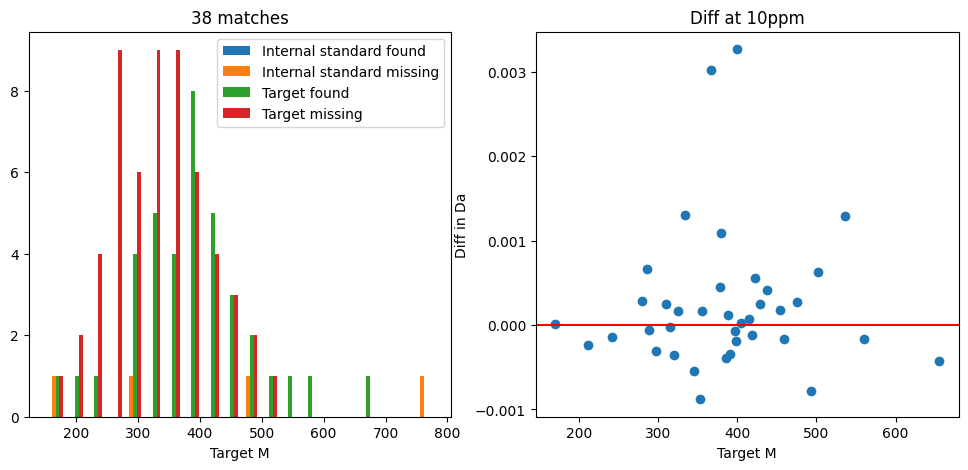

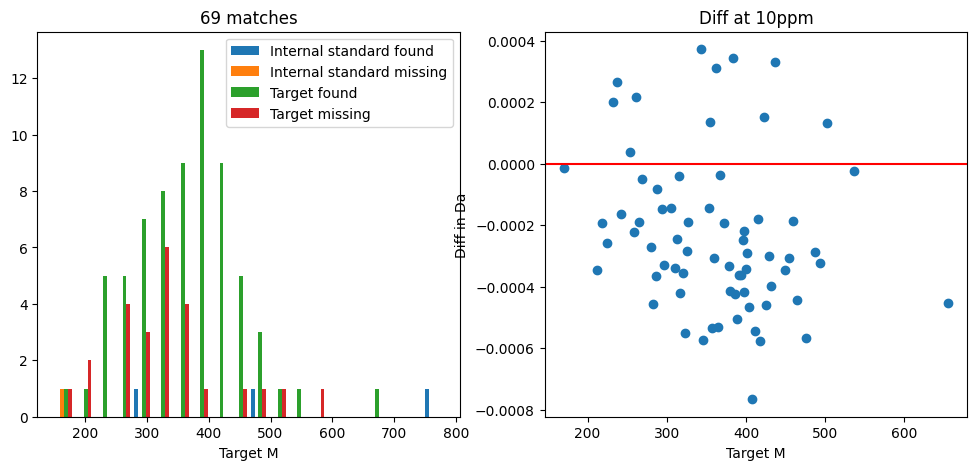

In [6]:
well="A14"
ppm=10
plot_match_and_error(msms,well,ppm, values_df)
plot_match_and_error(test,well,ppm,values_df)

In [8]:
data_combined=pd.DataFrame(columns=test.columns)
t=0
ppm=5
for well in test["Well"].unique():
        
        data_out=match_one_well(test,well,ppm,values_df)[-1]
        t=t+len(values_df[values_df["Position"]==well])
        data_combined=pd.concat([data_combined,data_out])
    
data_filtered=data_combined.dropna(subset="Target")#.iloc[:,[-1,0,1,2,3,7,-4,-3,-2]]
print("Found: ", round(len(data_filtered)/t*100,3), "%")
data_filtered.columns=['CCS', 'Precursor_type', 'PrecursorMZ', 'POLARITY', 'CHARGE', 'RT',
       'peaks', 'Well', 'M', 'Target', 'SMILES', 'InChIKey', 'Name']

data_filtered.to_csv("plate20250408_matched_"+str(ppm)+"ppm.csv")

----- Targeting A10
Converting m/z to m for matching
Found 70 / 96 matches at 5 ppm
----- Targeting A11
Converting m/z to m for matching


/tmp/ipykernel_21241/3661236061.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined=pd.concat([data_combined,data_out])


Found 69 / 98 matches at 5 ppm
----- Targeting A12
Converting m/z to m for matching
Found 68 / 92 matches at 5 ppm
----- Targeting A13
Converting m/z to m for matching
Found 68 / 94 matches at 5 ppm
----- Targeting A14
Converting m/z to m for matching
Found 69 / 94 matches at 5 ppm
----- Targeting A15
Converting m/z to m for matching
Found 67 / 95 matches at 5 ppm
----- Targeting A16
Converting m/z to m for matching
Found 60 / 95 matches at 5 ppm
----- Targeting A17
Converting m/z to m for matching
Found 66 / 94 matches at 5 ppm
----- Targeting A18
Converting m/z to m for matching
Found 59 / 91 matches at 5 ppm
----- Targeting A19
Converting m/z to m for matching
Found 71 / 98 matches at 5 ppm
----- Targeting A01
Converting m/z to m for matching
Found 73 / 96 matches at 5 ppm
----- Targeting A20
Converting m/z to m for matching
Found 67 / 89 matches at 5 ppm
----- Targeting A21
Converting m/z to m for matching
Found 66 / 93 matches at 5 ppm
----- Targeting A22
Converting m/z to m for m

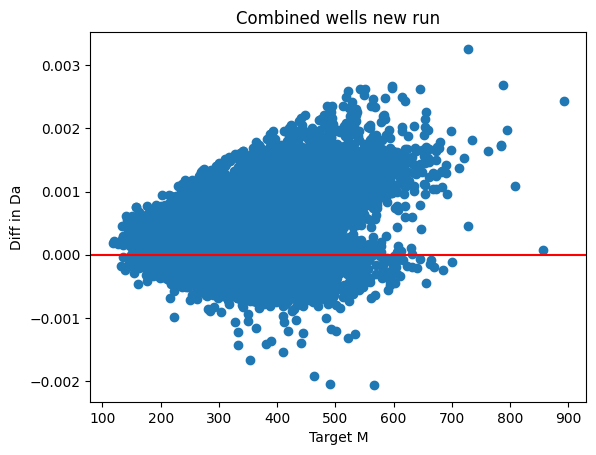

In [128]:

data=data_filtered
plt.scatter(data["Target"],data["M"]-data["Target"])
plt.ylabel("Diff in Da")
plt.xlabel("Target M")
plt.title("Combined wells new run")
plt.axhline(y=0, color='r', linestyle='-')

In [8]:
# To compare with old
data_combined=pd.DataFrame(columns=msms.columns)
t=0
for well in msms["Well"].unique():
        
        data_out=match_one_well(msms,well,ppm,values_df)[-1]
        t=t+len(values_df[values_df["Position"]==well])
        data_combined=pd.concat([data_combined,data_out])
    
data_filtered=data_combined.dropna(subset="Target").iloc[:,[-1,0,1,2,3,7,-4,-3,-2]]
print("Found: ", round(len(data_filtered)/t*100,3), "%")

----- Targeting B21
Found 36 / 95 matches at 10 ppm
----- Targeting A24
Found 44 / 91 matches at 10 ppm
----- Targeting B11
Found 47 / 94 matches at 10 ppm
----- Targeting B12


/tmp/ipykernel_6489/1737689113.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_combined=pd.concat([data_combined,data_out])


Found 41 / 97 matches at 10 ppm
----- Targeting B03
Found 10 / 89 matches at 10 ppm
----- Targeting B10
Found 11 / 92 matches at 10 ppm
----- Targeting B18
Found 10 / 98 matches at 10 ppm
----- Targeting A09
Found 15 / 90 matches at 10 ppm
----- Targeting A16
Found 17 / 95 matches at 10 ppm
----- Targeting C08
Found 10 / 90 matches at 10 ppm
----- Targeting B02
Found 15 / 98 matches at 10 ppm
----- Targeting C10
Found 35 / 92 matches at 10 ppm
----- Targeting B16
Found 19 / 95 matches at 10 ppm
----- Targeting B22
Found 8 / 92 matches at 10 ppm
----- Targeting A05
Found 43 / 96 matches at 10 ppm
----- Targeting A14
Found 38 / 94 matches at 10 ppm
----- Targeting B20
Found 14 / 96 matches at 10 ppm
----- Targeting B08
Found 42 / 94 matches at 10 ppm
----- Targeting C03
Found 26 / 89 matches at 10 ppm
----- Targeting A23
Found 38 / 93 matches at 10 ppm
----- Targeting A19
Found 40 / 98 matches at 10 ppm
----- Targeting B01
Found 21 / 93 matches at 10 ppm
----- Targeting C02
Found 9 / 93 

<StemContainer object of 3 artists>

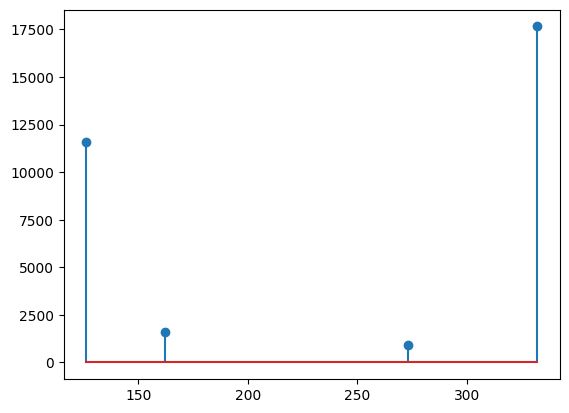

In [125]:
max(list(data_filtered.iloc[0,6]["intensity"]))
plt.stem(data_filtered.iloc[0,6]["mz"],data_filtered.iloc[0,6]["intensity"])

In [38]:
!python filter_data.py -i "plate20250408_matched_5ppm.csv" -o "plate20250408_5ppm_preprocessed.csv"

Working with Python 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:26:04) [GCC 10.4.0]
Dropped 91.359 % of the peaks due to low intensity
Removing  10 / 25891 due to precursor out of spec
Successfully interpreted 25881 from 25881 entries. Dropping the rest.
Checking if main layer InChI-Keys are correct. Result: confirmed! (1.000 correct)
Dropping all other.
Distinguish CE absolute values (eV - float) and normalized CE (in % - str format)
Detected 1 unique collision energies in range from 20.0 to 20.0 eV
Total number of uniquely matched peaks: 63397 , conflicts found within 6298 matches (9.04 %))
Total number of conflicting peak to fragment matches: 6298
Found 19464 unique molecular structures.
> Processing precursors
0 found with misaligned precursor. Removing these.
---------- Number of matched MS/MS spectrum:  19648 --------------
Saving as plate20250408_5ppm_preprocessed.csv


In [ ]:
!python ../../'MS models'/fiora/notebooks/train_model_test.py -i plate20250408_5ppm_preprocessed.csv -l 0.00002 -e 100 -t "all_wells_mona_ft" -m ../../checkpoint_Mona_only.best.pt

[10:50:54] WARNING: not removing hydrogen atom without neighbors
[10:50:54] WARNING: not removing hydrogen atom without neighbors
[10:50:54] WARNING: not removing hydrogen atom without neighbors
Working with Python 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:26:04) [GCC 10.4.0]
Filtering based on CE and weight
